<a href="https://colab.research.google.com/github/mmutyampeta/EduML/blob/main/ModelSelection(FINAL)Classification_EduML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [2]:
dataset = pd.read_csv("2015_16_DistrictwiseNEW.csv")
imp_mean = SimpleImputer(strategy='mean')
dataset = imp_mean.fit_transform(dataset)
dataset = pd.DataFrame(dataset)

In [3]:
X = dataset.loc[:, dataset.columns != 'OVERALL_LI']
y = dataset.iloc[:,11]
X = np.array(X)

y_new = []
for i in y:
  if i >= 85:
    y_new.append(0)
  else:
    y_new.append(1)
y = y_new
y = np.array(y)
y = y.reshape(-1,1)
y = y.ravel()
columns = list(dataset.columns)
features1 = columns[1:11]
features2 = columns[12:]
features = features1 + features2

In [4]:
scores = {}

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(510, 813)
(170, 813)
(510,)
(170,)


###Support Vector Classifier 

In [6]:
from sklearn.svm import SVC
modelSVC = SVC(kernel = 'rbf', random_state=0)

Hyperparameter Tuning

In [40]:
np.linspace(1,1e+5, num=10)

array([1.0000e+00, 1.1112e+04, 2.2223e+04, 3.3334e+04, 4.4445e+04,
       5.5556e+04, 6.6667e+04, 7.7778e+04, 8.8889e+04, 1.0000e+05])

In [7]:
from sklearn.model_selection import GridSearchCV
paramSVC = [{'C': [1.0000e+00, 1.1112e+04, 2.2223e+04, 3.3334e+04, 4.4445e+04,
       5.5556e+04, 6.6667e+04, 7.7778e+04, 8.8889e+04, 1.0000e+05], 
               'gamma': [1.000000e-05, 2.500075e-01, 5.000050e-01, 7.500025e-01,
       1.000000e+00], 
               'kernel': ['linear']
               },
              {'C': [1.0000e+00, 1.1112e+04, 2.2223e+04, 3.3334e+04, 4.4445e+04,
       5.5556e+04, 6.6667e+04, 7.7778e+04, 8.8889e+04, 1.0000e+05],
               'gamma': [1.000000e-05, 2.500075e-01, 5.000050e-01, 7.500025e-01,
       1.000000e+00],
               'kernel': ['rbf']
              }]

gridsearchSVC = GridSearchCV(modelSVC, param_grid=paramSVC, scoring='accuracy')
gridsearchSVC.fit(X_train,y_train)
#score2 = cross_val_score(model2, X, y.ravel(), scoring='accuracy', cv = 10)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1.0, 11112.0, 22223.0, 33334.0, 44445.0,
                                55556.0, 66667.0, 77778.0, 88889.0, 100000.0],
                          'gamma': [1e-05, 0.2500075, 0.500005, 0.7500025, 1.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 11112.0, 22223.0, 33334.0, 44445.0,
                                55556.0, 66667.0, 77778.0, 88889.0, 100000.0],
                          'gamma': [1e-05, 0.2500075, 0.500005, 0.7500025, 1.0],
        

In [8]:
print(gridsearchSVC.best_estimator_)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


In [14]:
bestSVC = gridsearchSVC.best_estimator_
print(bestSVC.coef_)
#score = cross_val_score(bestSVC, X, y.ravel(), scoring='accuracy', cv = 10)
#scores['SVC'] = score

AttributeError: ignored

Feature Selection (Using Recursive Feature Elimination)

In [12]:
from sklearn.feature_selection import RFECV
selectorSVC = RFECV(bestSVC)
selectorSVC.fit(X, y)
selectorSVC.ranking_

RuntimeError: ignored

##Naive Bayes Classifier 

Feature: 0, Score: 0.01554
Feature: 1, Score: 0.01366
Feature: 2, Score: 0.18210
Feature: 3, Score: 0.31187
Feature: 4, Score: 0.08511
Feature: 5, Score: 0.01827
Feature: 6, Score: 0.16178
Feature: 7, Score: 0.05608
Feature: 8, Score: 0.13069
Feature: 9, Score: 0.02491


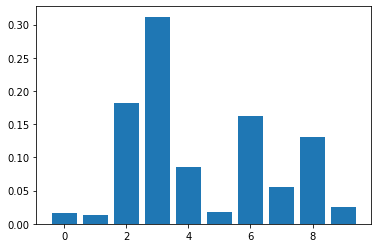

Feature: 0, Score: 0.02334
Feature: 1, Score: 0.01888
Feature: 2, Score: 0.19360
Feature: 3, Score: 0.30226
Feature: 4, Score: 0.09237
Feature: 5, Score: 0.01345
Feature: 6, Score: 0.16909
Feature: 7, Score: 0.02038
Feature: 8, Score: 0.12544
Feature: 9, Score: 0.04119


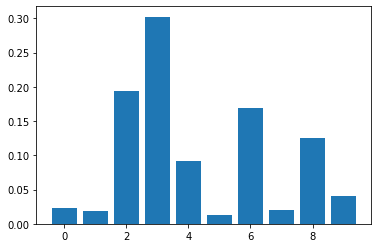

In [16]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [44]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()

Hyperparameter Tuning

In [45]:
print(np.linspace(1e-9,1,num=50))

[1.00000000e-09 2.04081642e-02 4.08163275e-02 6.12244907e-02
 8.16326540e-02 1.02040817e-01 1.22448980e-01 1.42857144e-01
 1.63265307e-01 1.83673470e-01 2.04081633e-01 2.24489797e-01
 2.44897960e-01 2.65306123e-01 2.85714286e-01 3.06122450e-01
 3.26530613e-01 3.46938776e-01 3.67346939e-01 3.87755103e-01
 4.08163266e-01 4.28571429e-01 4.48979592e-01 4.69387756e-01
 4.89795919e-01 5.10204082e-01 5.30612245e-01 5.51020409e-01
 5.71428572e-01 5.91836735e-01 6.12244898e-01 6.32653062e-01
 6.53061225e-01 6.73469388e-01 6.93877551e-01 7.14285715e-01
 7.34693878e-01 7.55102041e-01 7.75510204e-01 7.95918368e-01
 8.16326531e-01 8.36734694e-01 8.57142857e-01 8.77551021e-01
 8.97959184e-01 9.18367347e-01 9.38775510e-01 9.59183674e-01
 9.79591837e-01 1.00000000e+00]


In [46]:
param_NB = {'var_smoothing': [1.00000000e-09, 2.04081642e-02, 4.08163275e-02, 6.12244907e-02,
 8.16326540e-02, 1.02040817e-01, 1.22448980e-01, 1.42857144e-01,
 1.63265307e-01, 1.83673470e-01, 2.04081633e-01, 2.24489797e-01,
 2.44897960e-01, 2.65306123e-01, 2.85714286e-01, 3.06122450e-01,
 3.26530613e-01, 3.46938776e-01, 3.67346939e-01, 3.87755103e-01,
 4.08163266e-01, 4.28571429e-01, 4.48979592e-01, 4.69387756e-01,
 4.89795919e-01, 5.10204082e-01, 5.30612245e-01, 5.51020409e-01,
 5.71428572e-01, 5.91836735e-01, 6.12244898e-01, 6.32653062e-01,
 6.53061225e-01, 6.73469388e-01, 6.93877551e-01, 7.14285715e-01,
 7.34693878e-01, 7.55102041e-01, 7.75510204e-01, 7.95918368e-01,
 8.16326531e-01, 8.36734694e-01, 8.57142857e-01, 8.77551021e-01,
 8.97959184e-01, 9.18367347e-01, 9.38775510e-01, 9.59183674e-01,
 9.79591837e-01, 1.00000000e+00]}

gridNB = GridSearchCV(modelNB, param_grid=param_NB, scoring='accuracy')
gridNB.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [1e-09, 0.0204081642, 0.0408163275,
                                           0.0612244907, 0.081632654,
                                           0.102040817, 0.12244898, 0.142857144,
                                           0.163265307, 0.18367347, 0.204081633,
                                           0.224489797, 0.24489796, 0.265306123,
                                           0.285714286, 0.30612245, 0.326530613,
                                           0.346938776, 0.367346939,
                                           0.387755103, 0.408163266,
                                           0.428571429, 0.448979592,
                                           0.469387756, 0.489795919,
                                           0.510204082, 0.530612245,
                               

In [47]:
print(gridNB.best_estimator_)

GaussianNB(priors=None, var_smoothing=0.0612244907)


In [48]:
bestNB = gridNB.best_estimator_
score = cross_val_score(bestNB, X, y.ravel(), scoring='accuracy', cv = 10)
scores['NaiveBayes'] = score

Feature Selection (Using Recursive Feature Elimination)

##Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
modelDecision = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

Hyperparameter Tuning

In [18]:
paramDecision = [{
    "criterion": ['gini'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5,6,7,8,9]
},
{
    "criterion": ['entropy'],
    'splitter': ["best", "random"],
    'max_depth': [1,2,3,4,5,6,7,8,9]
}]

gridsearchDecision = GridSearchCV(modelDecision, param_grid=paramDecision, scoring='accuracy')
gridsearchDecision.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    

In [19]:
print(gridsearchDecision.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


In [22]:
bestDecision = gridsearchDecision.best_estimator_
#scoreDecision = cross_validate(bestDecision, X, y.ravel(), cv=10, scoring='accuracy')
#scores['DecisionTree'] = scoreDecision

Feature Selection (Using Recursive Feature Elimination)

In [24]:
selectorDecision = RFECV(bestDecision)
selectorDecision.fit(X, y)
#selectorDecision.feature_importances

RFECV(cv=None,
      estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=1,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=0,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

##Random Forest Regression

In [53]:
from sklearn.ensemble import RandomForestClassifier
modelRandom = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
#scoreRandom = cross_val_score(modelRandom, X, y.ravel(), cv=10, scoring='accuracy')
#scores['RandomForest'] = scoreRandom

Hyperparameter Tuning

In [54]:
n_estimators = [int(i) for i in np.linspace(1,60, num=10)]
criterion = ['gini', 'entropy']
max_feat = ['auto', 'sqrt', 'log2']
max_deep = [int(i) for i in np.linspace(1,10,num=5)]
minSamSplit = [int(i) for i in np.linspace(1,10,num=5)]
minSamLeaf = [int(i) for i in np.linspace(1,10,num=5)]
bootstrap = [True, False]

In [55]:
paramRandom = [{
    'criterion': criterion,
    'n_estimators': n_estimators,
    "max_features": max_feat,
    #'max_depth': max_deep,
    #'min_samples_split': minSamSplit,
    #'min_samples_leaf': minSamLeaf,
    'bootstrap': bootstrap
}]
gridsearchRandom = GridSearchCV(modelRandom, param_grid=paramRandom, scoring='accuracy')
gridsearchRandom.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, 

In [56]:
print(gridsearchRandom.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [57]:
RandomBest = gridsearchRandom.best_estimator_
scoreRandom = cross_val_score(RandomBest, X, y.ravel(), cv=10, scoring='accuracy')
scores['RandomForest'] = scoreRandom

Feature Selection (Using Recursive Feature Elimination)

###Score Evaluation

In [59]:
print('NaiveBayes')
print((sum(scores['NaiveBayes'])) / (len(scores['NaiveBayes'])))
print('SVC')
print((sum(scores['SVC'])) / (len(scores['SVC'])))
print('DecisionTree')
print((sum(scores['DecisionTree'])) / (len(scores['DecisionTree'])))
print('RandomForest')
print((sum(scores['RandomForest'])) / (len(scores['RandomForest']))) 

NaiveBayes
0.9588235294117646
SVC
0.9588235294117646
DecisionTree
0.9588235294117646
RandomForest
0.9852941176470587


In [60]:
means = []
for i in scores:
  #means.append(sum(scores[i])) / (len(scores[i]))
  print(i)
  print(scores[i])

SVC
[0.97058824 0.97058824 0.95588235 0.95588235 0.95588235 0.95588235
 0.95588235 0.95588235 0.95588235 0.95588235]
NaiveBayes
[0.97058824 0.97058824 0.95588235 0.95588235 0.95588235 0.95588235
 0.95588235 0.95588235 0.95588235 0.95588235]
DecisionTree
[0.97058824 0.97058824 0.95588235 0.95588235 0.95588235 0.95588235
 0.95588235 0.95588235 0.95588235 0.95588235]
RandomForest
[0.98529412 1.         0.95588235 0.95588235 0.98529412 0.98529412
 1.         1.         1.         0.98529412]


This piece of code conducted grid search to be able to tune hyperparameters to identify the best estimator for each classification model.
Then I performed cross validation to ensure the highest testing accuracy